#**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Adding Labels to the Datasets**

In [ ]:
# Adding labels to the datasets
"""import glob

normalData = glob.glob('/content/drive/MyDrive/datasets/normal/normal/' + '*.csv')
imbalance6gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/6g/' + '*.csv')
imbalance10gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/10g/' + '*.csv')
imbalance15gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/15g/' + '*.csv')
imbalance20gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/20g/' + '*.csv')
imbalance25gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/25g/' + '*.csv')
imbalance30gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/30g/' + '*.csv')
imbalance35gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/35g/' + '*.csv')

def labelAdder(path, label):
    for i in path:
        data = pd.read_csv(i, header=None)
        data[8] = label
        data.to_csv(i, index=False)

labelAdder(normalData, 0)
labelAdder(imbalance6gData, 1)
labelAdder(imbalance10gData, 2)
labelAdder(imbalance15gData, 3)
labelAdder(imbalance20gData, 4)
labelAdder(imbalance25gData, 5)
labelAdder(imbalance30gData, 6)
labelAdder(imbalance35gData, 7)"""

#**Train Test Split**

In [ ]:
# Adding path to all the csv files
"""
import glob
import random

normalData = glob.glob('/content/drive/MyDrive/datasets/normal/normal/' + '*.csv')
imbalance6gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/6g/' + '*.csv')
imbalance10gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/10g/' + '*.csv')
imbalance15gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/15g/' + '*.csv')
imbalance20gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/20g/' + '*.csv')
imbalance25gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/25g/' + '*.csv')
imbalance30gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/30g/' + '*.csv')
imbalance35gData = glob.glob('/content/drive/MyDrive/datasets/imbalance/imbalance/35g/' + '*.csv')

DataTotal = normalData + imbalance6gData + imbalance10gData + imbalance15gData + imbalance20gData + imbalance25gData + imbalance30gData + imbalance35gData

def fileSelector(path):
  random.shuffle(path)
  print(path)
  totalLength = len(path)
  dataTrain = pd.DataFrame()
  dataTest = pd.DataFrame()
  counter=1
  for i in path:
    if counter < int(round(0.9*totalLength)):
      data = pd.read_csv(i)
      dataTrain = pd.concat([dataTrain, data], ignore_index=True)
    else:
      data = pd.read_csv(i)
      dataTest = pd.concat([dataTest, data], ignore_index=True)
    counter += 1
  return dataTrain, dataTest

dataTrain, dataTest = fileSelector(DataTotal)
"""
"""dataTrain.to_csv('/content/drive/MyDrive/ProjectDataTrain.csv', index=False)
dataTest.to_csv('/content/drive/MyDrive/ProjectDataTest.csv', index=False)"""

['/content/drive/MyDrive/datasets/imbalance/imbalance/15g/14.5408.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/6g/21.7088.csv', '/content/drive/MyDrive/datasets/normal/normal/25.6.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/25g/15.7696.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/10g/19.2512.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/20g/61.0304.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/30g/43.6224.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/30g/38.7072.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/10g/46.08.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/10g/51.4048.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/25g/19.2512.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/6g/31.5392.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/15g/34.816.csv', '/content/drive/MyDrive/datasets/imbalance/imbalance/15g/19.6608.csv', '/content/drive/MyDrive

#**Read the Dataset**

In [2]:
dataTrain = pd.read_csv('/content/drive/MyDrive/ProjectDataTrain.csv')
dataTest = pd.read_csv('/content/drive/MyDrive/ProjectDataTest.csv')

#**Check for missing data**

In [ ]:
def missCheck(data):
  if data.isnull().sum().sum() == 0:
    print('Checked, no missing value')
  else:
    print('There are missing values in ')

missCheck(dataTrain)
missCheck(dataTest)

Checked, no missing value
Checked, no missing value


**VIsualization of One Instance from normData**

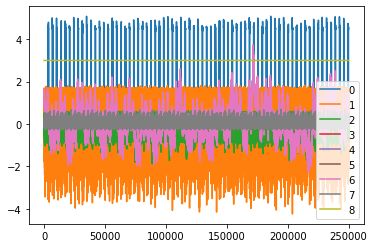

In [ ]:
dataTrain.iloc[:250000, :].plot()
plt.show()

**Too many datapoints to process**  
**Need to resample the data to reduce the data size**

In [ ]:
from scipy import signal
from scipy.fft import fft
#"""
def FFT(data, rate):
  step = 5 * rate
  data = data.values
  x = len(data)/step
  for i in range(0, int(x)):
    i = step * i
    label = data[i, 8]
    dataFFT = fft(data[i:(step+i), 0:8], axis=0)
    dataFFT = dataFFT[1:, :]
    labels = (np.ones(len(dataFFT))*int(label)).reshape(len(dataFFT), 1)
    dataFFT = np.hstack((dataFFT, labels))
    if i == 0:
      totalFFT = dataFFT
    else:
      totalFFT = np.vstack((totalFFT, dataFFT))
  totalFFT = pd.DataFrame(abs(totalFFT))
  return totalFFT

a = FFT(dataTrain.iloc[:250000, :], 50000)

**Visualize the FFT**

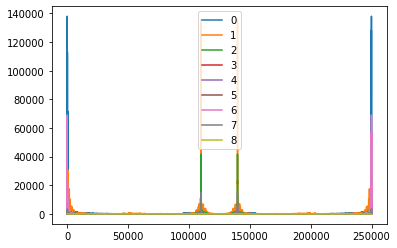

In [ ]:
a.plot()
plt.show()

#**Anomaly Detection**

In [ ]:
from sklearn.neighbors import NearestNeighbors
x = dataTest.iloc[:, 0].values.reshape(len(dataTest.values), 1)
knn = NearestNeighbors(n_neighbors=5).fit(x)

distances, indics = knn.kneighbors(x)
maxHeight = max(distances.mean(axis=1))

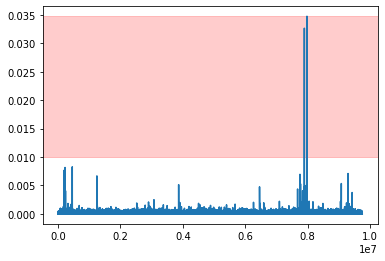

In [ ]:
plt.plot(pd.DataFrame(distances.mean(axis=1)))
plt.axhspan(0.01, maxHeight, alpha=0.2, color='red')
plt.show()

In [3]:
from scipy import signal

def resampling(data, rate):
  data = data.values
  x = len(data)/(50000 * 5)
  for i in range(0, int(x)):
    i = 250000 * i
    individualResampled = signal.resample(data[i : (250000 + i), :], rate * 5) # resampled at 500 hz for each instance in 49 instances
    if i == 0:
      totalResampled = individualResampled
    else:
      totalResampled = np.vstack((totalResampled, individualResampled))
#    print(totalResampled.shape)
  return pd.DataFrame(totalResampled)

dataTrainResampled = resampling(dataTrain, 100)
dataTestResampled = resampling(dataTest, 100)

**Check FFT after Resampled**

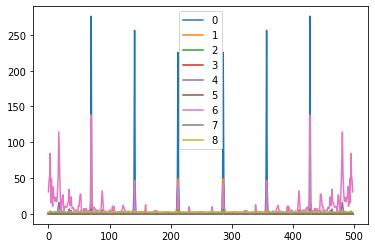

In [ ]:
b = FFT(dataTrainResampled.iloc[:500, :], 100)
b.plot()
plt.show()

#**Creating Lag Feature**

In [4]:
def createLag(data, rate):
  dataLabel = data[8]
  data = data.iloc[:, :8]
  dataShift = pd.concat([data.shift(4), data.shift(3), data.shift(2), data.shift(1), data, dataLabel], axis=1)
  dataShift = dataShift.dropna()
  return dataShift

dataTrainFFT = createLag(dataTrainResampled, 100)
dataTestFFT = createLag(dataTestResampled, 100)

#**Split the labels from dataset**

In [5]:
def labelSplit(data):
  dataLabel = data.iloc[:, 40]
  data = data.iloc[:, :40]
  return data.values, dataLabel.values

dataTrainD, dataTrainLabel = labelSplit(dataTrainFFT)
dataTestD, dataTestLabel = labelSplit(dataTestFFT)

In [6]:
y_train = dataTrainLabel.reshape(len(dataTrainLabel), 1)
y_test = dataTestLabel.reshape((len(dataTestLabel), 1))
dataTrainLabel = 0
dataTestLabel = 0

#**Standardization**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(dataTrainD)
X_test = scaler.transform(dataTestD)

#**Reshape the dataset**

In [8]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(171496, 1, 40)
(171496, 1)
(19496, 1, 40)
(19496, 1)


#**LSTM Model**

Epoch 1/1000
2/2 [==============================] - 5s 621ms/step - loss: 2.0649 - accuracy: 0.1232 - val_loss: 2.0682 - val_accuracy: 0.0791
Epoch 2/1000
2/2 [==============================] - 0s 185ms/step - loss: 1.9807 - accuracy: 0.1282 - val_loss: 1.9722 - val_accuracy: 0.1518
Epoch 3/1000
2/2 [==============================] - 0s 185ms/step - loss: 1.8992 - accuracy: 0.2246 - val_loss: 1.9389 - val_accuracy: 0.1282
Epoch 4/1000
2/2 [==============================] - 0s 191ms/step - loss: 1.8155 - accuracy: 0.2683 - val_loss: 1.8422 - val_accuracy: 0.1503
Epoch 5/1000
2/2 [==============================] - 0s 186ms/step - loss: 1.7129 - accuracy: 0.3071 - val_loss: 1.7596 - val_accuracy: 0.1996
Epoch 6/1000
2/2 [==============================] - 0s 198ms/step - loss: 1.5974 - accuracy: 0.3816 - val_loss: 1.7063 - val_accuracy: 0.2775
Epoch 7/1000
2/2 [==============================] - 0s 187ms/step - loss: 1.4817 - accuracy: 0.4531 - val_loss: 1.6168 - val_accuracy: 0.3971
Epoch 

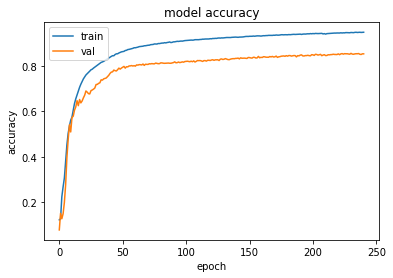

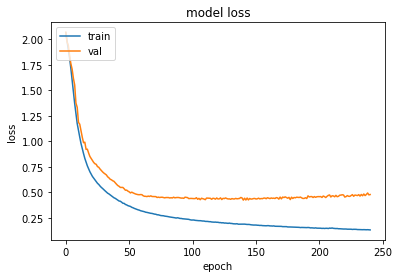

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.01)
early_stop = EarlyStopping(monitor='val_loss', patience=100)

LSTMmodel = Sequential()
LSTMmodel.add(LSTM(300, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
LSTMmodel.add(Dropout(0.3))
LSTMmodel.add(LSTM(300, activation='relu'))
LSTMmodel.add(Dropout(0.3))
LSTMmodel.add(Dense(8, activation='softmax'))

LSTMmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LSTMhist = LSTMmodel.fit(X_train, y_train, epochs=1000, callbacks=[early_stop], validation_data=(X_test, y_test), batch_size=int(len(X_train)/2))
LSTMmodel.summary()

plt.plot(LSTMhist.history['accuracy'])
plt.plot(LSTMhist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(LSTMhist.history['loss'])
plt.plot(LSTMhist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#**Playground**

In [ ]:
y = LSTMmodel.predict(X_test)

In [ ]:
y[97495]

array([9.9999928e-01, 1.3182357e-05, 5.0936535e-05, 2.5727245e-11,
       2.2944816e-08, 1.2873913e-09, 4.7593587e-03, 9.9984300e-01],
      dtype=float32)

In [ ]:
y_test[97495]

array([0.])